<a href="https://colab.research.google.com/github/LuziaAm/DataScience/blob/main/Aula3_ML_INDT_Supervisionado_Balanceamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [286]:
#Aula3_ML_INDT_Supervisionado_Balanceamento.ipynb

In [287]:
#Balancear dados
#Auto: Luzia Amorim
#15/07/21

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [289]:
dados = pd.read_csv('/content/fertility_Diagnosis.txt', ',')

In [290]:
# Avaliar a frequencia original das classes

In [291]:
dados.Output.value_counts()

N    88
O    12
Name: Output, dtype: int64

In [292]:
#Balancear os dados (em função da Classe)
#Usando SMOTE

In [293]:
from imblearn.over_sampling import SMOTE

In [294]:
#Segmetar os dados em duas bases: Uma com os atributos e outra com as classes

In [295]:
dados_atributos=dados.drop(columns='Output')

In [296]:
dados_classe = dados['Output']

In [297]:
#Construir um objeto a partir do SMOTE

In [298]:
balanceador = SMOTE()

In [299]:
#Executar o balanceador

In [300]:
dados_atributos_b,dados_classe_b = balanceador.fit_resample(
    dados_atributos,dados_classe
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [301]:
#dados_classe_b.value_counts() #não funcionou no colab

In [302]:
from collections import Counter

In [303]:
#Visualizar os dados Balanceados

In [304]:
contagem_classes = Counter(dados_classe_b)

In [305]:
contagem_classes

Counter({'N': 88, 'O': 88})

In [306]:
#Recompor os dados

In [307]:
dados_atributos_b =  pd.DataFrame(dados_atributos_b, columns=['Season',
                                                              'Age',
                                                              'Childish_diseases',
                                                              'Accident',
                                                              'Surgical_intervention',
                                                              'High_fevers',
                                                              'alcohol_consumption',
                                                              'Smoking',
                                                              'hours_sitting'])

In [308]:
dados_classe_b =  pd.DataFrame(dados_classe_b, columns=['Output'])

In [309]:
dados = dados_atributos_b.join(dados_classe_b, how='left')

In [310]:
dados.head() # FIM DO BALANCEAMENTO

,Season,Age,Childish_diseases,Accident,Surgical_intervention,High_fevers,alcohol_consumption,Smoking,hours_sitting,Output
0,-0.33,0.69,0.0,1.0,1.0,0.0,0.8,0.0,0.88,N
1,-0.33,0.94,1.0,0.0,1.0,0.0,0.8,1.0,0.31,O
2,-0.33,0.50,1.0,0.0,0.0,0.0,1.0,-1.0,0.50,N
3,-0.33,0.75,0.0,1.0,1.0,0.0,1.0,-1.0,0.38,N
4,-0.33,0.67,1.0,1.0,0.0,0.0,0.8,-1.0,0.50,O


In [311]:
#CRIAR UM MODELO CLASSIFICADOR

In [312]:
from sklearn.model_selection import train_test_split #Divisão de porcentagem de amostra teste

In [313]:
#a)Segmentar m atributos e classes

In [314]:
dados_atributos = dados.drop(columns='Output')
dados_classe =  dados['Output']

In [315]:
#b) Segmentar em base de treinamento e base para teste

In [316]:
atributos_treinamento, atributos_testes, classe_treinamento, classe_testes = train_test_split(dados_atributos,dados_classe, test_size=0.3)

In [317]:
#c)Obter o modelo

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
#c)Treinar o modelo

In [320]:
rf = RandomForestClassifier() #instancia

In [321]:
fertility_RF = rf.fit(atributos_treinamento, classe_treinamento)

In [322]:
#Pre testar o modelo utilizando as classes para teste

In [323]:
test_fertility = fertility_RF.predict(atributos_testes)

In [324]:
test_fertility

array(['N', 'N', 'O', 'O', 'N', 'N', 'N', 'N', 'O', 'N', 'N', 'O', 'N',
       'N', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'N', 'N', 'N', 'N', 'O',
       'N', 'O', 'O', 'O', 'O', 'N', 'O', 'O', 'N', 'O', 'N', 'N', 'N',
       'O', 'O', 'O', 'O', 'N', 'N', 'N', 'N', 'O', 'N', 'O', 'O', 'N',
       'N'], dtype=object)

In [325]:
for i in range(0,len(classe_testes)):
  print('Classe:', classe_testes.iloc[i],':',test_fertility[i])

Classe: N : N
Classe: N : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : O
Classe: N : O
Classe: O : O
Classe: O : O
Classe: N : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: N : N
Classe: N : N
Classe: O : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: O : O
Classe: N : O
Classe: N : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : N
Classe: O : O
Classe: O : O
Classe: N : O
Classe: O : O
Classe: N : N
Classe: N : N
Classe: O : N
Classe: N : N
Classe: O : O
Classe: O : N
Classe: O : O
Classe: O : O
Classe: N : N
Classe: N : N


In [326]:
from pickle import dump

In [327]:
dump(test_fertility,open('random.pkl','wb'))

In [328]:
from sklearn.tree import DecisionTreeClassifier

In [329]:
rf1 = DecisionTreeClassifier()

In [330]:
fertility_DTC = rf1.fit(atributos_treinamento,classe_treinamento)

In [331]:
test_fertility_DTC = fertility_DTC.predict(atributos_testes)

In [332]:
test_fertility_DTC

array(['N', 'N', 'O', 'O', 'N', 'N', 'N', 'N', 'O', 'N', 'N', 'O', 'N',
       'N', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'N', 'N', 'N', 'N', 'O',
       'N', 'O', 'O', 'O', 'O', 'N', 'O', 'O', 'N', 'O', 'N', 'N', 'N',
       'O', 'O', 'O', 'N', 'N', 'N', 'N', 'N', 'O', 'N', 'O', 'O', 'N',
       'N'], dtype=object)

In [333]:
#Teste preliminar de acurácia

In [334]:
from sklearn import metrics

In [335]:
metrics.accuracy_score(classe_testes,test_fertility)

0.8490566037735849

In [336]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

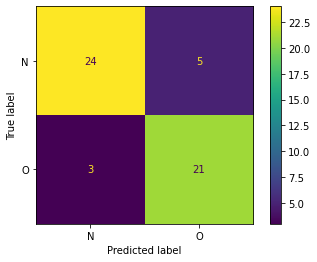

In [337]:
plot_confusion_matrix(fertility_RF, atributos_testes,classe_testes)

In [338]:
#--------CROSS VALIDATION

In [339]:
#Segmentar a base em atributos e classes (caso não esteja segmentada)
#dados_atributos
#dados_classe
#importar o CROSS_VAL

In [340]:
from sklearn.model_selection import cross_val_score

In [341]:
scores =  cross_validate(fertility_RF,dados_atributos,dados_classe, cv=10)#cv = kfolds

In [342]:
scores #cross_val

{'fit_time': array([0.12980628, 0.12953901, 0.12607932, 0.12382841, 0.13066602,
        0.12638283, 0.15710759, 0.12801862, 0.12840343, 0.13133001]),
 'score_time': array([0.00853324, 0.00878716, 0.00906277, 0.00863719, 0.00851178,
        0.0148499 , 0.00901127, 0.01254058, 0.00872231, 0.00998783]),
 'test_score': array([0.55555556, 0.77777778, 1.        , 0.94444444, 1.        ,
        0.88888889, 0.94117647, 0.94117647, 0.94117647, 0.88235294])}

In [343]:
scores.mean #acuracia global

AttributeError: ignored

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scoring = ['precision_macro','recall_macro']

In [ ]:
scoring

In [ ]:
scores2 =  cross_validate(fertility_RF, dados_atributos, dados_classe, scoring=scoring,cv=10)

In [ ]:
scores.keys()

In [ ]:
#Acuracia Global score2

In [ ]:
score2['precision_macro'].mean()

In [ ]:
#Sensibilidade

In [ ]:
score2['recall_macro'].mean()